<a href="https://colab.research.google.com/github/ayarii/learner-engagement/blob/main/second_mothod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
print(tf.__version__)


2.12.0


/content/datasets/Student-engagement-dataset
/content/datasets/Student-engagement-dataset
Populating the interactive namespace from numpy and matplotlib
Shape of the image (21216,)


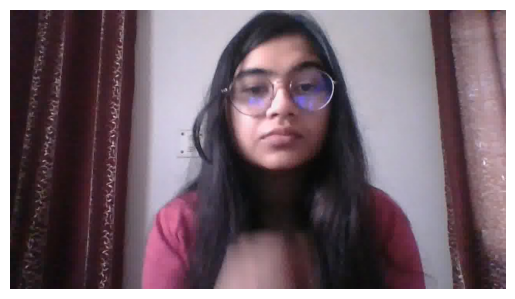

Found 2120 files belonging to 2 classes.
Using 1696 files for training.
Found 2120 files belonging to 2 classes.
Using 424 files for validation.
['Engaged', 'Not engaged']
Shape of the image (14893,)


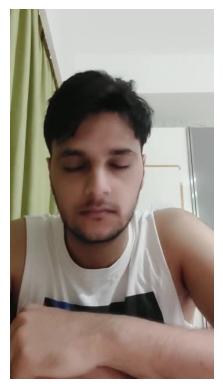

In [15]:
# import biblio
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding

#Import dataset
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/ayarii/learner-engagement/blob/main/Student-engagement-dataset.zip?raw=true",
    extract=False)
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
data_dir = pathlib.Path('/content/datasets/Student-engagement-dataset')
print(data_dir)
print(os.path.abspath(data_dir))

%pylab inline
url_engaged = r'https://github.com/ayarii/learner-engagement/blob/main/0076.jpg?raw=true'
resp = requests.get(url_engaged, stream=True).raw
image_array_engagement = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_engagement.shape}')
image_engagement = cv2.imdecode(image_array_engagement, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
plt.show()
# les variables
batch_size = 3
img_height = 200
img_width = 200
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)
url_notEngaged = r'https://github.com/ayarii/learner-engagement/blob/main/0025.jpg?raw=true'
resp = requests.get(url_notEngaged, stream=True).raw
image_array_notEngaged = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_notEngaged.shape}')
image_notEngaged = cv2.imdecode(image_array_notEngaged, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_notEngaged, cv2.COLOR_BGR2RGB))
plt.show()


In [16]:
# Define the model architecture
num_classes = 2
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
   layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='softmax')
])




In [17]:

# Compile the model
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'],)

In [ ]:
# Train the model
logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir)
model.fit(
  train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 31/566 [>.............................] - ETA: 2:21:02 - loss: 0.6914 - accuracy: 0.7634

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_data)
print('Test accuracy:', test_acc)